## 1. Business Understanding 

- A classic problem in the field of pattern recognition is that of handwritten digit recognition. 
- Suppose that you have an image of a digit submitted by a user via a scanner, a tablet, or other digital devices.
- The goal is to develop a SVM model which should correctly identify the handwritten digits based on the pixel values given as features.

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

## 2. Data Understanding

- We use the MNIST data which is a large database of handwritten digits where we have pixel values of each digit along with its label. 
- The MNIST database of handwritten digits has a training set of 42,000 observations and a test set of 28,000 observations. 
- There are 784 columns which consist of 28*28 matrix describing the scanned image of the digits

In [2]:
# Loading the test and train data
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [3]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train dataset

In [5]:
# Inspect the various aspects of the train dataframe
print(train_dataset.shape)

# No columns and rows have null values
print(train_dataset.info())

# Description about the train dataframe
print(train_dataset.describe())

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8    ...         pixel774      pixel775  \
count  42000.0  42000.0  42000.0    ...     42000.000000

#### Test dataset

In [6]:
# Inspect the various aspects of the test dataframe
print(test_dataset.shape)

# No columns and rows have null values
print(test_dataset.info())

# Description about the test dataframe
print(test_dataset.describe())

(28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None
        pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0  28000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9    ...         pixel774      pixel775      pixel776  \
count  28000.0

## 3. Data Cleaning & Preparation

#### Train dataset

In [7]:
# look for duplicates before data cleaning
# summing up the missing values
print(train_dataset.duplicated().sum())
print(train_dataset.isnull().sum())

0
label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


#### Test dataset

In [8]:
# look for duplicates before data cleaning
# summing up the missing values
print(test_dataset.duplicated().sum())
print(test_dataset.isnull().sum())

0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64


In [9]:
# average feature values
round(train_dataset.drop('label', axis=1).mean(), 2)

pixel0      0.00
pixel1      0.00
pixel2      0.00
pixel3      0.00
pixel4      0.00
pixel5      0.00
pixel6      0.00
pixel7      0.00
pixel8      0.00
pixel9      0.00
pixel10     0.00
pixel11     0.00
pixel12     0.00
pixel13     0.01
pixel14     0.01
pixel15     0.00
pixel16     0.00
pixel17     0.00
pixel18     0.00
pixel19     0.00
pixel20     0.00
pixel21     0.00
pixel22     0.00
pixel23     0.00
pixel24     0.00
pixel25     0.00
pixel26     0.00
pixel27     0.00
pixel28     0.00
pixel29     0.00
            ... 
pixel754    0.00
pixel755    0.00
pixel756    0.00
pixel757    0.00
pixel758    0.00
pixel759    0.00
pixel760    0.00
pixel761    0.01
pixel762    0.04
pixel763    0.08
pixel764    0.11
pixel765    0.18
pixel766    0.30
pixel767    0.41
pixel768    0.51
pixel769    0.56
pixel770    0.68
pixel771    0.60
pixel772    0.49
pixel773    0.34
pixel774    0.22
pixel775    0.12
pixel776    0.06
pixel777    0.02
pixel778    0.02
pixel779    0.00
pixel780    0.00
pixel781    0.

In [10]:
train_dataset=train_dataset.sample(frac=0.20, random_state=100)
train_dataset

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5883,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
329,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38210,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22066,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. Exploratory Data Analysis

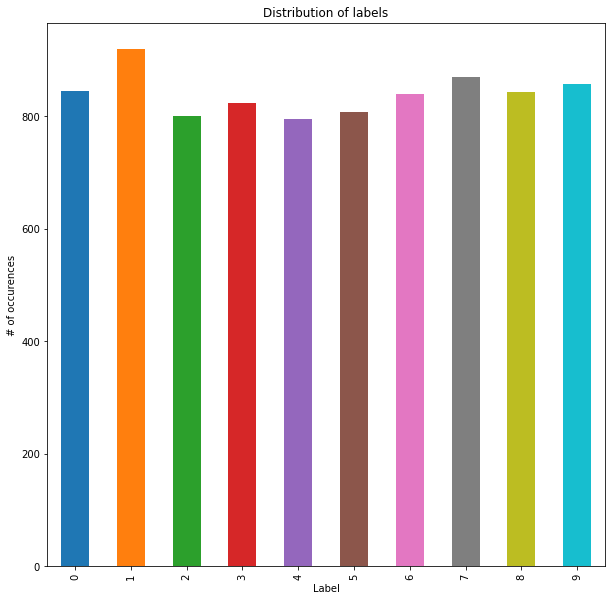

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)
train_dataset['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of labels')
plt.xlabel('Label')
plt.ylabel('# of occurences')
plt.show()

In [12]:
# splitting into X and y
X = train_dataset.drop("label", axis = 1)
y = train_dataset['label']

In [13]:
def plot_data(X, y, title='Label', size=12):
    plt.rcParams['figure.constrained_layout.use'] = True
    dataset_size = X.shape[0]
    label = pd.Series(y)
    # Converting and reshaping each row of the dataset as a 28x28 image to have a plottable array
    images = [
       X.iloc[i, :].values.reshape(28, 28) for i in range(dataset_size)
    ]

    # Selecting a random sample of size=12(by default) from the dataset
    select = np.random.randint(dataset_size, size=size)
    rows = np.floor(np.sqrt(size))
    cols = np.ceil(size / rows)
    
    # Plotting each image with its corresponding label
    for index, value in enumerate(select):
        plt.subplot(rows, cols, index + 1)
        plt.axis('off')
        plt.imshow(
            images[value],
            cmap=plt.cm.gray_r,
            interpolation="nearest")
        plt.title('{}: {}'.format(title, int(label.iloc[value])))

    plt.show()

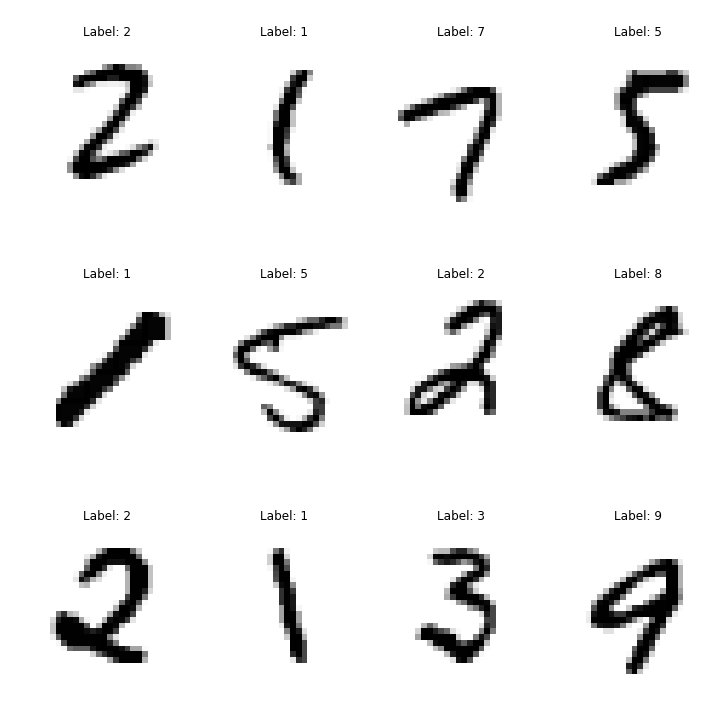

In [14]:
plot_data(X, y)

## 5. Model Building & Evaluation

Let's fist build two basic models - linear and non-linear with default hyperparameters, and compare the accuracies.

In [15]:
# splitting into X and y
X = train_dataset.drop("label", axis = 1)
y = train_dataset['label']

In [16]:
# scaling the features
X_scaled = scale(X)

In [17]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 101)

In [18]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)


In [19]:
# confusion matrix and accuracy

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[256   0   2   0   0   2   3   0   0   0]
 [  0 267   2   0   0   0   0   0   1   1]
 [  4   2 223   9   5   6   4   7   2   0]
 [  0   3   6 234   0   8   0   0   5   1]
 [  0   1   2   1 220   0   2   4   0   9]
 [  2   4   3  12   1 198   4   1   9   1]
 [  2   1   3   0   3   3 255   0   0   0]
 [  0   6   3   1   6   1   1 216   2  12]
 [  1   4   3   9   1  11   2   3 189   0]
 [  1   1   2   5  11   3   0  17   7 208]] 

accuracy 0.8992063492063492


The linear model gives approx. 89.92% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

In [20]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [21]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9273809523809524 

[[251   0   3   1   0   1   2   4   1   0]
 [  0 266   2   0   0   0   0   1   1   1]
 [  4   0 237   5   4   1   0   8   2   1]
 [  0   1   4 240   0   5   1   5   0   1]
 [  0   1   3   0 221   0   0   2   0  12]
 [  0   2   1   4   2 215   5   2   3   1]
 [  1   1   1   0   2   0 255   6   1   0]
 [  1   2   3   1   5   1   0 227   2   6]
 [  1   3   2   3   1   5   1   4 202   1]
 [  1   0   1   8   6   1   0  13   2 223]]


The non-linear model gives approx. 92.73% accuracy. Thus, going forward, let's choose hyperparameters corresponding to non-linear models.

### Grid Search: Hyperparameter Tuning

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [22]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [1,10,100,1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 17.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001, 1e-05], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [23]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,151.584610,2.108956,21.087973,0.322053,1,0.01,"{'C': 1, 'gamma': 0.01}",0.743197,0.741497,0.731293,...,0.739286,0.004221,15,1.000000,1.000000,1.000000,1.000000,0.999787,0.999957,0.000085
1,43.105642,0.485002,13.067179,0.178226,1,0.001,"{'C': 1, 'gamma': 0.001}",0.926871,0.920068,0.922619,...,0.923980,0.002441,4,0.972151,0.971088,0.972151,0.970451,0.968750,0.970918,0.001264
2,65.643614,0.785987,17.291358,0.218234,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.892007,0.873299,0.893707,...,0.890136,0.010238,11,0.909439,0.908588,0.912415,0.907526,0.907313,0.909056,0.001845
3,150.976047,1.680228,23.285132,0.147932,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.624150,0.625850,0.659014,...,0.647959,0.023350,16,0.659439,0.646046,0.668367,0.641582,0.674532,0.657993,0.012612
4,158.832975,0.517282,20.247836,0.137787,10,0.01,"{'C': 10, 'gamma': 0.01}",0.765306,0.758503,0.743197,...,0.756973,0.007460,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,37.249364,0.261124,11.781582,0.125222,10,0.001,"{'C': 10, 'gamma': 0.001}",0.931973,0.929422,0.937075,...,0.932823,0.003271,1,0.999150,0.999362,0.999362,0.998937,0.998724,0.999107,0.000248
6,28.448380,0.904695,10.585882,0.137777,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.926871,0.910714,0.909014,...,0.919048,0.007594,5,0.957908,0.960247,0.958971,0.958546,0.958333,0.958801,0.000800
7,62.676310,0.850782,16.940965,0.183639,10,1e-05,"{'C': 10, 'gamma': 1e-05}",0.893707,0.875000,0.892007,...,0.891156,0.010401,10,0.908376,0.908163,0.911352,0.907313,0.906250,0.908291,0.001704
8,172.079207,2.454302,24.173514,0.507261,100,0.01,"{'C': 100, 'gamma': 0.01}",0.765306,0.758503,0.743197,...,0.756973,0.007460,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,42.650700,4.716191,12.449431,0.778461,100,0.001,"{'C': 100, 'gamma': 0.001}",0.931122,0.928571,0.937925,...,0.932313,0.003749,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


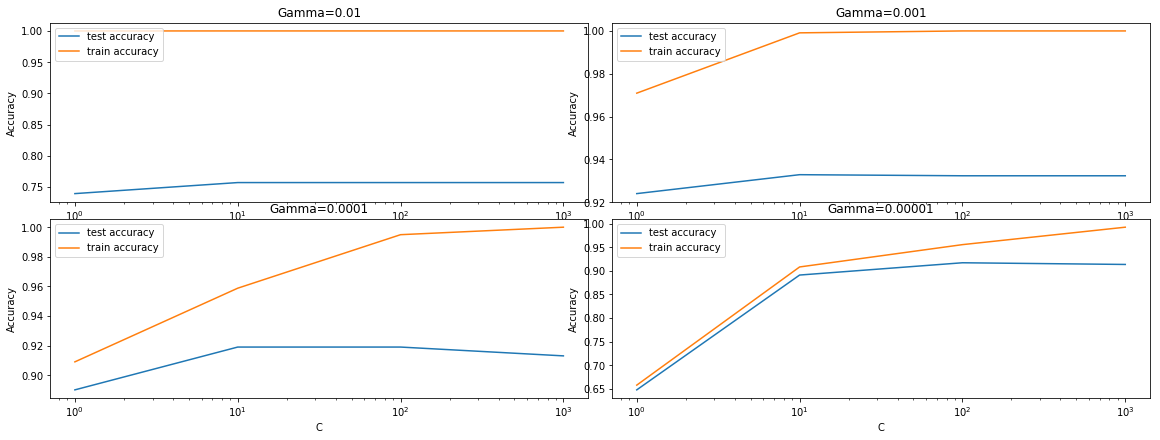

In [29]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/4
plt.subplot(221)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/4
plt.subplot(222)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/4
plt.subplot(223)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 4/4
plt.subplot(224)
gamma_00001 = cv_results[cv_results['param_gamma']==0.00001]

plt.plot(gamma_00001["param_C"], gamma_00001["mean_test_score"])
plt.plot(gamma_00001["param_C"], gamma_00001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")
#plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

The plots above show some useful insights:
- Non-linear models (high gamma) perform *much better* than the linear ones
- At any value of gamma, a high value of C leads to better performance
- None of the models tend to overfit (even the complex ones), since the training and test accuracies closely follow each other

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.

Let's now choose the best hyperparameters.

In [30]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9328231292517006 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


### Building and Evaluating the Final Model

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [31]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9349206349206349 

[[253   0   3   1   0   1   1   4   0   0]
 [  0 266   2   0   0   0   0   1   1   1]
 [  5   1 238   6   1   3   0   6   1   1]
 [  0   1   4 243   0   2   0   5   1   1]
 [  0   3   3   0 219   0   0   3   0  11]
 [  0   2   1   4   0 221   2   1   3   1]
 [  1   1   1   0   1   2 256   5   0   0]
 [  1   3   2   1   4   1   0 231   2   3]
 [  1   2   1   5   2   5   0   4 203   0]
 [  1   0   1   5   6   3   0   9   4 226]] 



## Conclusion

The accuracy achieved using a non-linear kernel (~0.93) is mush higher than that of a linear one (~0.89). We can conclude that the problem is highly non-linear in nature.

#### Create predictions for the test dataset for Kaggle

In [32]:
# scaling the features
y_scaled = scale(test_dataset)
y_pred = model.predict(y_scaled)
y_pred

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [33]:
predictions = pd.DataFrame([] , columns = ['Label'])
predictions['Label'] = y_pred
predictions.head()

,Label
0,2
1,0
2,9
3,4
4,3


In [30]:
# save predictions.csv for kaggle

predictions.to_csv('digit-recognizer.csv' , index = False)